In [271]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import linalg as la
import sys
import matplotlib.pyplot as plt
import seaborn as sas
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter

In [276]:
data_folder = Path("dataset/experiment-i/S1/")

file_name = data_folder / "13.txt"
df = pd.read_csv(file_name, sep="\t", header=None)
#df = pd.read_csv(file_name, sep="\t", header=None)
#la stessa posizione viene misurata 82 volte DC
df.drop(columns=[2048], inplace = True) #tolgo colonna
df.drop(0, inplace = True) #tolgo riga
df.drop(1, inplace = True) #tolgo riga
df.drop(2, inplace = True) #tolgo riga

df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
3,0,3,0,3,1,0,1,5,2,1,...,0,0,0,1,0,0,0,0,0,0
4,0,4,1,2,1,0,2,5,3,0,...,0,0,0,0,0,0,0,0,0,0
5,0,3,0,2,1,0,1,5,3,1,...,0,0,0,0,0,0,0,0,0,0
6,0,4,0,3,1,0,1,5,3,0,...,0,0,0,0,0,0,0,0,0,0
7,0,4,0,3,0,0,2,5,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,6,1,2,0,0,3,4,1,1,...,0,0,0,0,0,0,0,0,0,0
77,1,6,0,2,0,0,2,4,1,1,...,0,0,1,0,0,0,0,0,0,0
78,1,6,0,3,0,0,2,4,1,1,...,0,0,0,0,0,0,0,0,0,0
79,1,5,0,1,0,0,2,4,1,1,...,0,0,0,0,0,0,0,0,0,0


In [277]:
array = df.to_numpy()
#avg = array.mean()
avg = np.mean(array, axis = 1, keepdims=True)

print(avg.shape)
array = array - avg

CX = np.cov(array)
w,v = la.eig(CX) 

CY =  np.diag(np.round(np.real(w),2))
print("Trace of the original data matrix: " , np.round(CX.trace(),2))
print("Trace of the data matrix after the changes of base: ", np.round(CY.trace(),2), "\n")

tr = 0;
for i in range(0,len(CY)):
    tr = tr + CY[i,i]
    print("Fraction of the total variability keeping only the first principal component: ", np.round(100*tr/CY.trace()),"%")


P = v[:,0:1]
print(P.shape)
P = abs(P)

array_final = P.T.dot(array)

(78, 1)
Trace of the original data matrix:  1728778.17
Trace of the data matrix after the changes of base:  1728778.16 

Fraction of the total variability keeping only the first principal component:  99.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction o

In [83]:
array_final[0] = array_final[0]
array_final[0][array_final[0] < 0] = 0
array_final[0][array_final[0] > 3000] = 1000

OldRange = array_final[0].max()  
NewRange = 1000 
for i in range(0,len(array_final[0])):
    array_final[0][i] = (((array_final[0][i]) * NewRange) / OldRange) 

file = open("prova1.txt", "w") 

for i in range(0,len(array_final[0])):
    l = i + 1;
    if(l%32 != 0):
        file.write(str(int(array_final[0][i])) + "\t") 
    else:
        file.write("\n") 
        
        
file.close() 

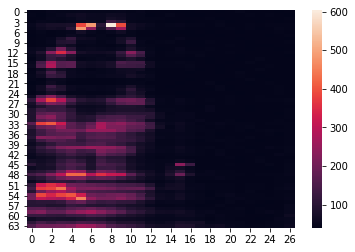

In [84]:
array = df.to_numpy()
sas.heatmap(array.reshape(64,27))

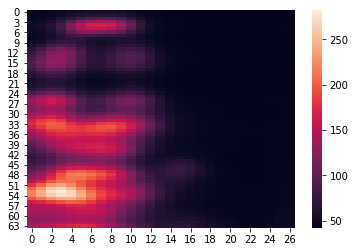

In [85]:


gauss = gaussian_filter(array, sigma=1.5)
#sas.heatmap(np.flip(gauss,0))
sas.heatmap(gauss.reshape(64,27))

In [86]:
tmp = array_final[0]

tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values of the shape of the body
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        if tmp[i][j] == 0:
            continue
        else:
            t.append(i)
            t.append(j)
            t.append(tmp[i][j])
            X.append(t)

X = np.array(X)


ValueError: cannot reshape array of size 27 into shape (64,32)

In [87]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

NameError: name 'X' is not defined

In [88]:
#center = [(6.5,15.5,500),(21.5,15.5,500),(38.,15.5,500),(55.,15.5,500)]
center = [(6.5,15.5,500),(21.5,15.5,500),(55.,15.5,500)]
center = np.array(center)
#km = km(n_clusters=4).fit(X_std)
km = km(n_clusters=3).fit(X_std)
km.labels_

y_km = km.predict(X_std)

o = km.cluster_centers_
print(o)
o = scaler.inverse_transform(o)
print(o)

NameError: name 'X_std' is not defined

In [58]:
sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)



ValueError: cannot reshape array of size 27 into shape (64,32)

In [59]:
lol = [3 for i in range(64*32)]

for i in range(0,len(X)):
    index = int(X[i][0]*32) + int(X[i][1])
    lol[index] = km.labels_[i]

lol = np.array(lol)
sas.heatmap(lol.reshape(64,32))

print(X[0:4])

NameError: name 'X' is not defined

In [79]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler

tmp = array_final[0]
tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        t.append(i)
        t.append(j)
        X.append(t)

X = np.array(X)

center = [(0,0),(16,0),(37,0),(64,0)]
center = np.array(center)
#km = km(n_clusters=4).fit(X)
km = km(n_clusters=4, init = center).fit(X)
km.labels_

y_km = km.predict(X)

o = km.cluster_centers_
print(o)

sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


ValueError: cannot reshape array of size 27 into shape (64,32)

In [61]:
#data_folder = Path("dataset/experiment-ii/S1/Air_Mat/")

file_name = "dataset.csv"
df = pd.read_csv(file_name, sep=",", header=0)
df

,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002341,0.000000,0.000000,0.000000,...,1.767449,0.000000,0.000000,0.000000,0.000000,0.167969,0.0,0.0,4,0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001719,0.000000,0.000000,0.000000,...,1.780317,0.000000,0.000000,0.000000,0.000000,0.170719,0.0,0.0,4,0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,...,1.814451,0.000000,0.000000,0.000000,0.000000,0.161157,0.0,0.0,4,0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001076,0.000000,0.000000,0.000000,...,1.795900,0.000000,0.000000,0.000000,0.000000,0.159603,0.0,0.0,4,0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002759,0.000000,0.000000,0.000000,...,1.754924,0.000000,0.000000,0.000000,0.000000,0.169571,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.0,0.0,0.0,36.649215,37.521815,34.904014,37.521815,42.757417,39.267016,37.521815,...,95.113438,38.394415,39.267016,39.267016,37.521815,38.394415,0.0,0.0,8,0
2668,0.0,0.0,0.0,70.234114,75.250836,88.628763,81.939799,90.301003,88.628763,86.956522,...,98.662207,88.628763,75.250836,70.234114,71.906355,71.906355,0.0,0.0,8,0
2669,0.0,0.0,0.0,6.658212,6.182625,6.975269,8.084971,7.292327,6.975269,7.292327,...,7.609385,7.292327,8.243500,6.975269,6.816741,7.133798,0.0,0.0,8,0
2670,0.0,0.0,0.0,8.624148,8.824709,8.824709,9.426394,9.426394,9.025271,9.025271,...,10.028079,9.025271,8.824709,8.624148,9.225832,8.824709,0.0,0.0,8,0


In [62]:
df.min(axis = 1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2667    0.0
2668    0.0
2669    0.0
2670    0.0
2671    0.0
Length: 2672, dtype: float64

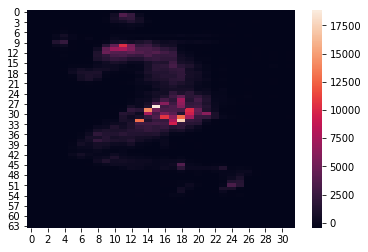

In [280]:
#START KMEANS
total = np.flip(array_final[0].reshape(64, 32), 1)
totale = gaussian_filter(total, sigma=1.5)
#total = np.reshape(total,(64,27))
sas.heatmap(total)


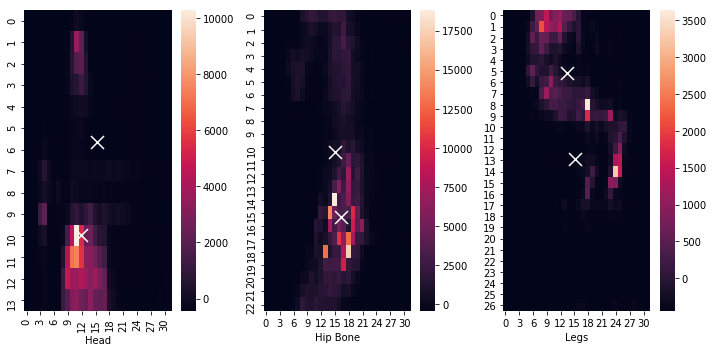

In [282]:
#define sections
section1 = total[:14]
section2 = total[14:37]
section3 = total[37:]

#build a vector for each point 
#every vector contains the coordinates and the intensity values
for h in range (0, 3):
    if h == 0:
        tmp = section1
        X1 = []
    if h == 1:
        tmp = section2
        X2 = []
    if h == 2:
        tmp = section3
        X3 = []
    
    for i in range(0, tmp.shape[0]):
        for j in range(0, tmp.shape[1]):
            if h == 0:
                t = []
                t.append(i)
                t.append(j)
                t.append(tmp[i][j])
                X1.append(t)
            if h == 1:
                t = []
                t.append(i)
                t.append(j)
                t.append(tmp[i][j])
                X2.append(t)
            if h == 2:
                t = []
                t.append(i)
                t.append(j)
                t.append(tmp[i][j])
                X3.append(t)

X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)

km1 = km(n_clusters=2).fit(X1)
km2 = km(n_clusters=2).fit(X2)
km3 = km(n_clusters=2).fit(X3)

o1 = km1.cluster_centers_
o2 = km2.cluster_centers_
o3 = km3.cluster_centers_

labels = ['Head', 'Hip Bone', 'Legs']

plt.figure(figsize=(10,5))

for i in range(1, 4):
    plt.subplot(1,3,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    if i == 1:
        sas.heatmap(section1.reshape(14,32))
        plt.scatter(o1[:,1], o1[:,0], marker='x', s=169, linewidths=3, color='w', zorder=10)
        plt.xlabel(labels[i-1])
    if i == 2:
        sas.heatmap(section2.reshape(23,32))
        plt.scatter(o2[:,1], o2[:,0], marker='x', s=169, linewidths=3, color='w', zorder=10)
        plt.xlabel(labels[i-1])
    if i == 3:
        sas.heatmap(section3.reshape(27,32))
        plt.scatter(o3[:,1], o3[:,0], marker='x', s=169, linewidths=3, color='w', zorder=10)
        plt.xlabel(labels[i-1])
    
    plt.tight_layout()


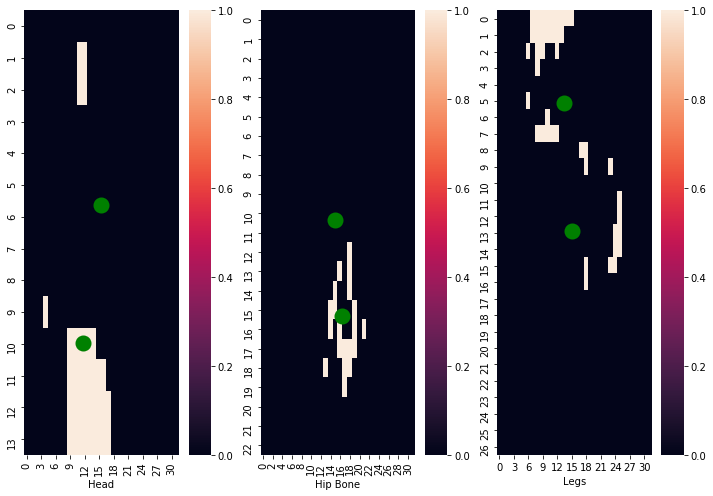

In [283]:
background1 = [1 for i in range(14*32)]
background2 = [1 for i in range(23*32)]
background3 = [1 for i in range(27*32)]

for h in range(0, 3):
    if h == 0:
        for i in range(0,len(X1)):
            index = int(X1[i][0]*32) + int(X1[i][1])
            background1[index] = km1.labels_[i]
    if h == 1:
        for i in range(0,len(X2)):
            index = int(X2[i][0]*32) + int(X2[i][1])
            background2[index] = km2.labels_[i]
    if h == 2:
        for i in range(0,len(X3)):
            index = int(X3[i][0]*32) + int(X3[i][1])
            background3[index] = km3.labels_[i]

background1 = np.array(background1)
background2 = np.array(background2)
background3 = np.array(background3)

plt.figure(figsize=(10, 7))

for i in range(1, 4):
    plt.subplot(1,3,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    if i == 1:
        sas.heatmap(background1.reshape(14,32))
        plt.scatter(o1[:,1], o1[:,0], marker='o', s=169, linewidths=3, color='g', zorder=10)
        plt.xlabel(labels[i-1])
    if i == 2:
        sas.heatmap(background2.reshape(23,32))
        plt.scatter(o2[:,1], o2[:,0], marker='o', s=169, linewidths=3, color='g', zorder=10)
        plt.xlabel(labels[i-1])
    if i == 3:
        sas.heatmap(background3.reshape(27,32))
        plt.scatter(o3[:,1], o3[:,0], marker='o', s=169, linewidths=3, color='g', zorder=10)
        plt.xlabel(labels[i-1])
    
    plt.tight_layout()


Text(0.5, 15.0, 'Total')

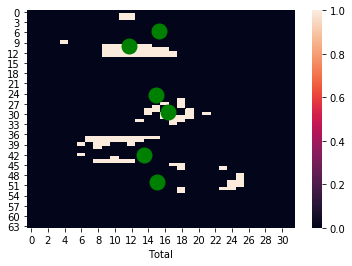

In [285]:
background_total = np.concatenate((background1, background2, background3), axis=0)

sas.heatmap(background_total.reshape(64,32)) 
plt.scatter(o1[:,1], o1[:,0], marker='o', s=169, linewidths=3, color='g', zorder=10)
plt.scatter(o2[:,1], o2[:,0] + 14, marker='o', s=169, linewidths=3, color='g', zorder=10)
plt.scatter(o3[:,1], o3[:,0] + 37, marker='o', s=169, linewidths=3, color='g', zorder=10)
plt.xlabel('Total')

In [286]:
for i in range(0, 3):

    cluster_1 = []
    cluster_2 = []
    
    if i == 0:
        for i in range(0,len(X1)):
            if km1.labels_[i] == 0:
                cluster_1.append(X1[i])
            else:
                cluster_2.append(X1[i])
                
        mean_1 = np.mean(cluster_1, axis = 0) 
        mean_2 = np.mean(cluster_2, axis = 0) 

        if mean_1[2] > mean_2[2]:
            mean_cluster = mean_1[2]
            y_pos = km1.cluster_centers_[0][0]
            x_pos = km1.cluster_centers_[0][1]
        else:
            mean_cluster = mean_2[2]
            y_pos = km1.cluster_centers_[1][0]
            x_pos = km1.cluster_centers_[1][1]

        print('SECTION HEAD')
        print('Cluster 1')
        print('(x, y) = ({}, {})'.format(x_pos, y_pos))
        print('Mean of the cluster is: {}'.format(mean_cluster))
        
        
    if i == 1:
        for i in range(0,len(X2)):
            if km2.labels_[i] == 0:
                cluster_1.append(X2[i])
            else:
                cluster_2.append(X2[i])

        mean_1 = np.mean(cluster_1, axis = 0) 
        mean_2 = np.mean(cluster_2, axis = 0) 

        if mean_1[2] > mean_2[2]:
            mean_cluster = mean_1[2]
            y_pos = km2.cluster_centers_[0][0]
            x_pos = km2.cluster_centers_[0][1]
        else:
            mean_cluster = mean_2[2]
            y_pos = km2.cluster_centers_[1][0]
            x_pos = km2.cluster_centers_[1][1]

        print()
        print('SECTION HIP BONE')
        print('(x, y) = ({}, {})'.format(x_pos, y_pos + 14))
        print('Mean of the cluster is: {}'.format(mean_cluster))
        
        
    if i == 2:
        for i in range(0,len(X3)):
            if km3.labels_[i] == 0:
                cluster_1.append(X3[i])
            else:
                cluster_2.append(X3[i])

        mean_1 = np.mean(cluster_1, axis = 0) 
        mean_2 = np.mean(cluster_2, axis = 0) 

        if mean_1[2] > mean_2[2]:
            mean_cluster = mean_1[2]
            y_pos = km3.cluster_centers_[0][0]
            x_pos = km3.cluster_centers_[0][1]
        else:
            mean_cluster = mean_2[2]
            y_pos = km3.cluster_centers_[1][0]
            x_pos = km3.cluster_centers_[1][1]

        print()
        print('SECTION LEGS')
        print('(x, y) = ({}, {})'.format(x_pos, y_pos + 37))
        print('Mean of the cluster is: {}'.format(mean_cluster))


check: [   6.14111922   15.79318735 -302.5384049 ] [  10.48648649   12.24324324 3519.58165156]
SECTION HEAD
Cluster 1
(x, y) = (12.243243243243244, 10.486486486486486)
Mean of the cluster is: 3519.581651559942
check: [ 10.86592179  15.46089385 110.19459121] [  15.8        16.9      9318.187492]

SECTION HIP BONE
(x, y) = (16.9, 29.8)
Mean of the cluster is: 9318.187491998668
check: [  13.37712895   15.58029197 -379.78493823] [  5.61904762  13.92857143 977.11679489]

SECTION LEGS
(x, y) = (13.928571428571429, 42.61904761904762)
Mean of the cluster is: 977.1167948863258
